In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

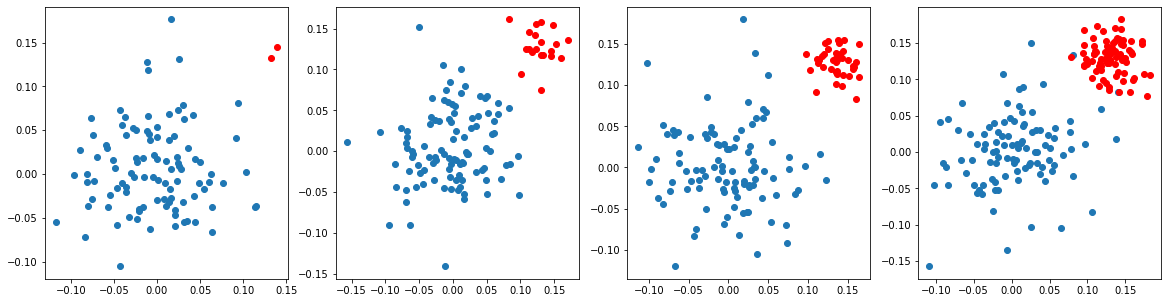

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

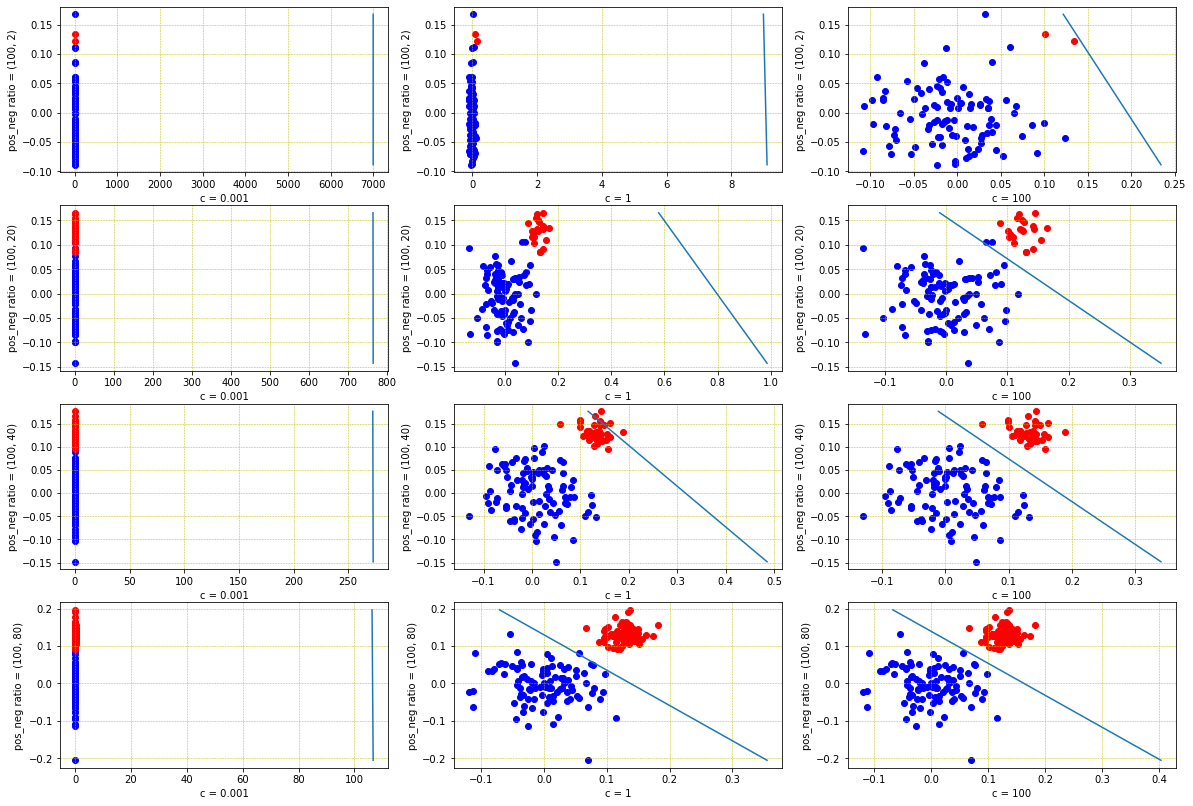

In [4]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

#creating 4 different datasets with above ratios and store them in a list.
datasets = []
datasets_labels = []
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    datasets.append(X)
    datasets_labels.append(y)

#Now select each dataset and apply SVM
c = [0.001, 1 , 100]
#c = [1, 10 , 100]
k=1
plt.figure(figsize=(20,14))
for i in range(len(datasets)):
    for j in range(len(c)):
        plt.subplot(len(datasets), len(c), k)
        clf = SVC(C= c[j], kernel='linear')
        clf.fit(datasets[i], datasets_labels[i])
        w = clf.coef_[0]
        intercept=clf.intercept_
        coef=list(clf.coef_)[0]
        
        #creating dataframe for easy plotting
        d1 = pd.DataFrame(datasets[i])
        d1['labels'] = datasets_labels[i]
        mi = d1[1].min()
        ma = d1[1].max()
        pos_pts = d1[d1.labels==1].drop('labels', axis=1)
        neg_pts = d1[d1.labels==0].drop('labels', axis=1)
        
        #Plotting
        plt.scatter(pos_pts[0], pos_pts[1], color = 'b')
        plt.scatter(neg_pts[0], neg_pts[1], color='r')
        plt.xlabel("c = {}".format(c[j]))
        plt.ylabel("pos_neg ratio = {}".format(ratios[i]))
        plt.grid(color='y', linestyle='--', linewidth=0.5)
        draw_line(coef,intercept, mi, ma)
        k +=1

    

**OBSERVATIONS:**

**1. For HIGHLY Imbalanced Data (Ratio 100:2)**

  - It is observed that regardless of any value of regularization factor C, model seems to be unable to distinguish the datapoints  from different classes if the data is highly imbalanced.
  - Distance of the hyperplane is far away from the datapoints with low value of C (0.001 and 1)

**2. For VERY Imbalanced Data (Ratio 100:20)**
 - For low values of C (0.001, 1), it is observed that the model is unable to distinguish the correct class labels.
 - It seems to perform satisfactorily with few errors with higher regularization factors i.e. C = 100

**3. For MODERATELY Imbalanced Data (Ratio 100:40)**
 - For moderately imbalanced data, model doesn't perform at all with lower regularization factor ( C = 0.001), however, It is able to distinguish few data points from other with significant errors in the prediction with moderate regularization. 
 - Furthermore, with higher regularization ( C = 100), the model seems to perform quite well.

**4. For SLIGHTLY Imbalanced Data (Ratio 100:80)**
 - For lower value of rgularization i.e. c = 0.001, from all the cases, It can be concluded that, if regularization factor is very low, model doesn't seems to classify regardless whether data is balanced or imbalanced.
 - For Moderate and higher values of regularization, model seems to classify the datapoints correctly with few datapoints very closed or resting on hyperplane.

___________

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

In [5]:
#you can start writing code here.
from sklearn.linear_model import LogisticRegression

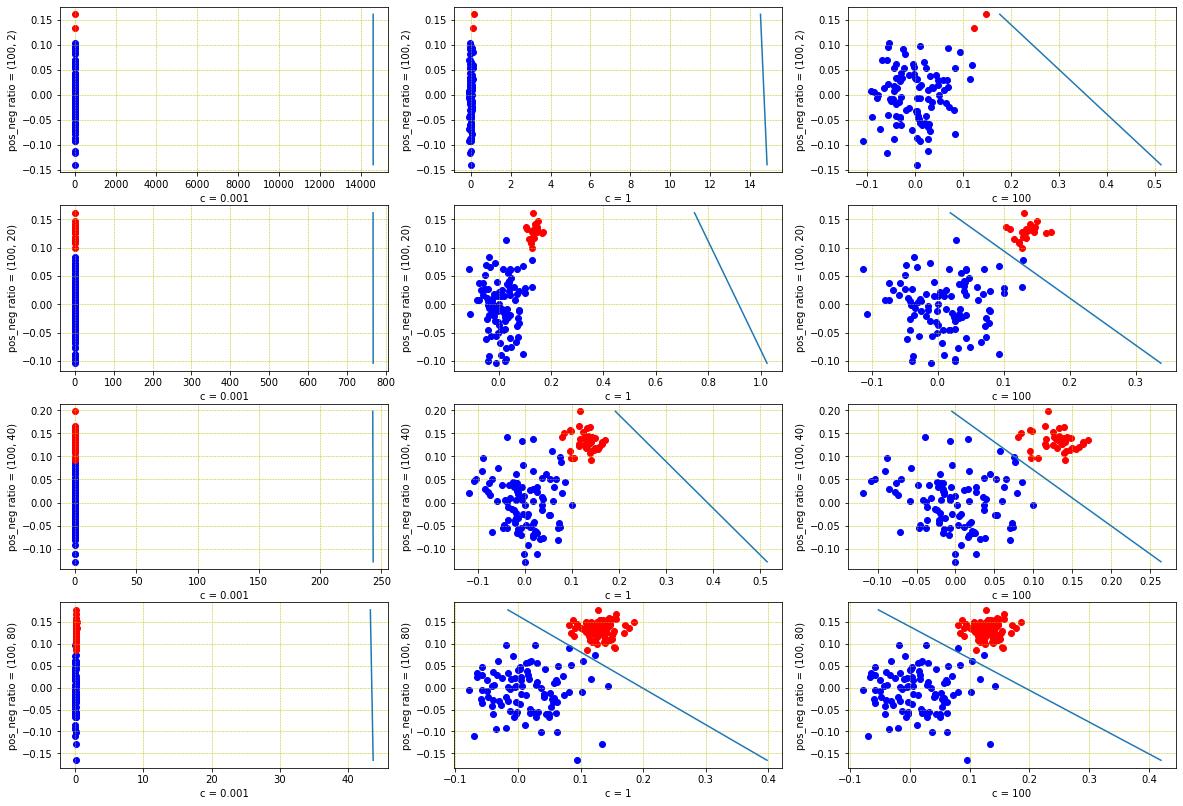

In [6]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]

#creating 4 different datasets with above ratios and store them in a list.
datasets = []
datasets_labels = []
for j,i in enumerate(ratios):
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    datasets.append(X)
    datasets_labels.append(y)

#Now select each dataset and apply SVM
c = [0.001, 1 , 100]
#c = [1, 10 , 100]
k=1
plt.figure(figsize=(20,14))
for i in range(len(datasets)):
    for j in range(len(c)):
        plt.subplot(len(datasets), len(c), k)
        clf = LogisticRegression(C= c[j])
        clf.fit(datasets[i], datasets_labels[i])
        w = clf.coef_[0]
        intercept=clf.intercept_
        
        #creating dataframe for easy plotting
        coef=list(clf.coef_)[0]
        d1 = pd.DataFrame(datasets[i])
        d1['labels'] = datasets_labels[i]
        mi = d1[1].min()
        ma = d1[1].max()
        pos_pts = d1[d1.labels==1].drop('labels', axis=1)
        neg_pts = d1[d1.labels==0].drop('labels', axis=1)
        
        #Plotting
        plt.scatter(pos_pts[0], pos_pts[1], color = 'b')
        plt.scatter(neg_pts[0], neg_pts[1], color='r')
        plt.xlabel("c = {}".format(c[j]))
        plt.ylabel("pos_neg ratio = {}".format(ratios[i]))
        plt.grid(color='y', linestyle='--', linewidth=0.5)
        draw_line(coef,intercept, mi, ma)
        k +=1

    

**OBSERVATIONS:**

**1. For HIGHLY Imbalanced Data (Ratio 100:2)**

  - It is observed that regardless of any value of regularization factor C, model seems to be unable to distinguish the datapoints  from different classes if the data is highly imbalanced.
  - Distance of the hyperplane is far away from the datapoints with low value of C (0.001 and 1)

**2. For VERY Imbalanced Data (Ratio 100:20)**
 - For low values of C (0.001, 1), it is observed that the model is unable to distinguish the correct class labels.
 - It seems to perform satisfactorily with few errors with higher regularization factors i.e. C = 100

**3. For MODERATELY Imbalanced Data (Ratio 100:40)**
 - For moderately imbalanced data, model doesn't perform at all with lower regularization factor (C = 0.001 and C=1), however, It is able to distinguish few data points from other with significant errors in the prediction with moderate regularization. 
 - Furthermore, with higher regularization ( C = 100), the model seems to perform quite well.

**4. For SLIGHTLY Imbalanced Data (Ratio 100:80)**
 - For lower value of rgularization i.e. c = 0.001, from all the cases, It can be concluded that, if regularization factor is very low, model doesn't seems to classify regardless whether data is balanced or imbalanced.
 - For Moderate and higher values of regularization, model seems to classify the datapoints correctly with few errors and datapoints very closed or resting on hyperplane.

**OVERALL OBSERVATIIONS**
 - Both SVM and Linear Regression Models doesn't seems to perform well in case of Highly Imbalanced Dataset.
 - Depending on the dataset, C may or may not produce different hyperplanes. (Refere all the images for data 100:80)
 

__________